In [1]:
import osmnx as ox
import matplotlib.pyplot as plt

<class 'networkx.classes.multidigraph.MultiDiGraph'>


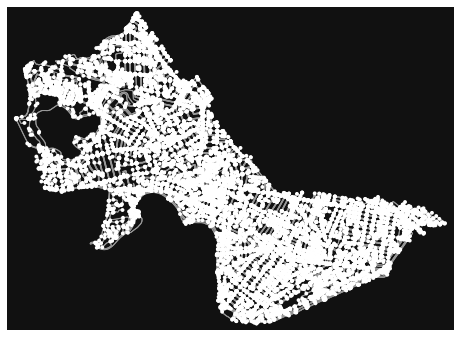

<Figure size 432x288 with 0 Axes>

In [2]:
place_name = "Cambridge, Massachusetts, USA"
graph = ox.graph_from_place(place_name)
print(type(graph))

fig, ax = ox.plot_graph(graph)
plt.tight_layout()

In [3]:
area = ox.geocode_to_gdf(place_name)
buildings = ox.geometries_from_place(place_name,{'building': True})
type(area)
type(buildings)

/Users/francischen/Desktop/osmnx-main/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Users/francischen/Desktop/osmnx-main/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


geopandas.geodataframe.GeoDataFrame

In [4]:
nodes, edges = ox.graph_to_gdfs(graph)
nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
61175693,42.398103,-71.128276,3,NaN,POINT (-71.12828 42.39810)
61182955,42.385184,-71.116133,4,traffic_signals,POINT (-71.11613 42.38518)
61283119,42.355899,-71.109581,4,NaN,POINT (-71.10958 42.35590)
61283126,42.356645,-71.108794,4,NaN,POINT (-71.10879 42.35665)
61283218,42.355993,-71.103318,3,NaN,POINT (-71.10332 42.35599)


In [5]:
edges.head()

osmid lanes              name  \
u        v          key                                                 
61175693 3895955644 0    [8615932, 386272429]     2    Elmwood Street   
61182955 7893597583 0                 8615747     1     Forest Street   
         7893597542 0                 9429431     2     Oxford Street   
         7893597530 0                 9429431     2     Oxford Street   
61283119 7870841845 0                 8615341     1  Brookline Street   

                                 highway width  oneway  length  \
u        v          key                                          
61175693 3895955644 0    [service, path]  12.2   False  51.634   
61182955 7893597583 0        residential  12.2    True   8.243   
         7893597542 0           tertiary  15.2   False   7.984   
         7893597530 0           tertiary  15.2   False   7.210   
61283119 7870841845 0           tertiary   NaN    True  10.223   

                                                                  geometry  \
u        v          key                                                      
61175693 3895955644 0    LINESTRING (-71.12828 42.39810, -71.12836 42.3...   
61182955 7893597583 0    LINESTRING (-71.11613 42.38518, -71.11603 42.3...   
         7893597542 0    LINESTRING (-71.11613 42.38518, -71.11614 42.3...   
         7893597530 0    LINESTRING (-71.11613 42.38518, -71.11613 42.3...   
61283119 7870841845 0    LINESTRING (-71.10958 42.35590, -71.10950 42.3...   

                        maxspeed  ref tunnel service access junction bridge  
u        v          key                                                      
61175693 3895955644 0        NaN  NaN    NaN     NaN    NaN      NaN    NaN  
61182955 7893597583 0     20 mph  NaN    NaN     NaN    NaN      NaN    NaN  
         7893597542 0     20 mph  NaN    NaN     NaN    NaN      NaN    NaN  
         7893597530 0     20 mph  NaN    NaN     NaN    NaN      NaN    NaN  
61283119 7870841845 0     25 mph  NaN    NaN     NaN    NaN      NaN    NaN

In [6]:
type(edges)

geopandas.geodataframe.GeoDataFrame

/Users/francischen/opt/anaconda3/envs/ox/lib/python3.10/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/francischen/opt/anaconda3/envs/ox/lib/python3.10/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/francischen/opt/anaconda3/envs/ox/lib/python3.10/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/francischen/opt/anaconda3/envs/ox/lib/python3.10/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other

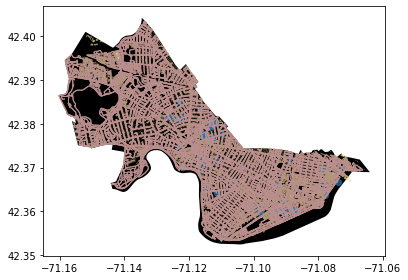

In [7]:
fig, ax = plt.subplots()
area.plot(ax=ax, facecolor='black')
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)
plt.tight_layout()